# 데이터 불러오기

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from matplotlib import rc
import matplotlib.pyplot as plt


rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus']=False  

In [44]:
total = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/total_cust.csv', index_col = 0)
total.head()

,1분기 대비2분기 증감여부,2분기 대비3분기 증감여부,3분기 대비4분기 증감여부,4분기 대비5분기 증감여부,5분기 대비6분기 증감여부,6분기 대비7분기 증감여부,7분기 대비8분기 증감여부
CUSTNO,,,,,,,
1,3,3,3,1,2,3,1
2,2,4,1,4,1,4,2
3,4,3,2,2,3,3,2
4,4,2,1,3,3,3,2
6,3,3,2,3,2,3,2


## 모델링

In [45]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

def get_clf_eval(y_test,pred,pred_proba):
    accuracy = accuracy_score(y_test,pred)
    print(f'정확도: {accuracy}')
    
def get_model_train_eval(df, models):
    x = df.drop('label', axis = 1)
    y = df['label']

    # 학습/테스트용 분리
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)
    
    for model in models:
        print(model)
        model.fit(X_train, y_train)
        pred=model.predict(X_test)
        pred_proba=model.predict_proba(X_test)[:,1]
        get_clf_eval(y_test,pred,pred_proba)


# 모델리스트
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, 
                         boost_from_average=False)

model_li = [dt_clf, rf_clf, lgbm_clf]

## Frequency

In [46]:
# 1분기
year2014_q1 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q1.csv', index_col = 0)
year2014_q1['purchase_sum'] = year2014_q1.apply(lambda x:x.sum(), axis = 1)

# 2분기
year2014_q2 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q2.csv', index_col = 0)
year2014_q2['purchase_sum'] = year2014_q2.apply(lambda x:x.sum(), axis = 1)

# 3분기
year2014_q3 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q3.csv', index_col = 0)
year2014_q3['purchase_sum'] = year2014_q3.apply(lambda x:x.sum(), axis = 1)

#4분기
year2014_q4 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q4.csv', index_col = 0)
year2014_q4['purchase_sum'] = year2014_q4.apply(lambda x:x.sum(), axis = 1)

#5분기
year2015_q1 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q5.csv', index_col = 0)
year2015_q1['purchase_sum'] = year2015_q1.apply(lambda x:x.sum(), axis = 1)

# 6분기
year2015_q2 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q6.csv', index_col = 0)
year2015_q2['purchase_sum'] = year2015_q2.apply(lambda x:x.sum(), axis = 1)

#7분기
year2015_q3 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q7.csv', index_col = 0)
year2015_q3['purchase_sum'] = year2015_q3.apply(lambda x:x.sum(), axis = 1)

#8분기
year2015_q4 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Frequency_org_q8.csv', index_col = 0)
year2015_q4['purchase_sum'] = year2015_q4.apply(lambda x:x.sum(), axis = 1)

# 데이터 리스트
df_li = [year2014_q1, year2014_q2, year2014_q3, year2014_q4, year2015_q1, year2015_q2, year2015_q3, year2015_q4]
total_columns = year2015_q3.columns.tolist()

plus_or_minus_cust = []
for i in total_columns:
    feature = i + '_증감여부'
    plus_or_minus_cust.append(feature)
plus_or_minus_cust

def quater_weight_df(x, y): #1분기 대비 2분기 or 1분기 대비 3분기 각 분기 대입
    # 기준 원본 데이터
    df_q1 = df_li[x-1]
    # 비교할 원본 데이터
    df_q2 = df_li[y-1]
    
    # 대입할 데이터프레임 생성
    total_df = pd.DataFrame(columns = plus_or_minus_cust, index = year2015_q3.index)
    
    # 각 컬럼명 
    for i in total_columns:
        # 각 컬럼별 평균 증감율 = (비교할 데이터 - 기준 원본 데이터)/기준 원본 데이터
        mean_ratio = (df_q2.loc[:, i].sum() - df_q1.loc[:, i].sum())/df_q1.loc[:, i].sum()
        
        # 기준 금액 : 기준 원본데이터 * (1+mean_ratio)
        stand_price = df_q1.loc[:, i] * (1+mean_ratio)
        # 기준금액 컬럼명
        stand_column = i + '_기준금액'


        # 기준 금액 비교할 데이터프레임에 추가
        df_q2[stand_column] = stand_price

        # 비교할 원본 데이터 금액 과 기준금액 비교 후 크면 2, 작으면 0, 같으면 1 대입 
        # 비교할 원본 금액과 기준 금액 컬럼만 따로 추출
        df_whos_ = df_q2[[i, stand_column]]

        # 증가 고객
        df_whos_plus = df_whos_[df_whos_[i] > df_whos_[stand_column]] # 기준금액 보다 큰 경우
        # 감소 고객
        df_whos_minus = df_whos_[df_whos_[i] <= df_whos_[stand_column]] # 기준금액 보다 작은 경우

#         # 유지 고객
#         df_whos_same = df_whos_[df_whos_[i] == df_whos_[stand_column]] # 기준금액이랑 차이 없음

        # total_df에 값 대입
        input_column_name = i + '_증감여부'
        # 증가면 0
        total_df.loc[df_whos_plus.index, input_column_name] = 0
        # 감소면 1
        total_df.loc[df_whos_minus.index, input_column_name] = 1

    return total_df['purchase_sum_증감여부']

In [47]:
# 2분기 3분기
df1 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/2. 증감율 계산/Frequency_rate_q2_q1.csv', index_col = 0)
# 2분기 3분기
df2 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/2. 증감율 계산/Frequency_rate_q3_q2.csv', index_col = 0)
# 3분기 4분기
df3 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/2. 증감율 계산/Frequency_rate_q4_q3.csv', index_col = 0)
# 4분기 5분기
df4 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/2. 증감율 계산/Frequency_rate_q5_q4.csv', index_col = 0)
# 5분기 6분기
df5= pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/2. 증감율 계산/Frequency_rate_q6_q5.csv', index_col = 0)
# 6분기 7분기
df6= pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/2. 증감율 계산/Frequency_rate_q7_q6.csv', index_col = 0)

In [48]:
# 전체 데이터 
totalcolumns = total.columns[1:]
totalcolumns

# 분기별 데이터
df_li = [year2014_q1, year2014_q2, year2014_q3, year2014_q4, year2015_q1, year2015_q2, year2015_q3, year2015_q4]

q_df = [df2, df3, df4, df5, df6]

for ind, name in enumerate(totalcolumns):
    total_df = q_df[ind]
    total_df['total증감여부'] = total[name]
    before_ = ind + 2
    after_ = ind + 3
    total_df['label'] = quater_weight_df(before_, after_)
    total_df['label'] = total_df['label'].astype('int')
    
    model_li = [dt_clf, rf_clf, lgbm_clf]
    print(f'---Target : {before_}대비 {after_}---')
    get_model_train_eval(total_df, model_li)

---Target : 2대비 3---
DecisionTreeClassifier()
정확도: 0.8484366719660837
RandomForestClassifier()
정확도: 0.8926868044515104
LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)
정확도: 0.8990461049284578
---Target : 3대비 4---
DecisionTreeClassifier()
정확도: 0.8518812930577636
RandomForestClassifier()
정확도: 0.8910969793322735
LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)
정확도: 0.8881822999470058
---Target : 4대비 5---
DecisionTreeClassifier()
정확도: 0.8473767885532592
RandomForestClassifier()
정확도: 0.8966613672496025
LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)
정확도: 0.8926868044515104
---Target : 5대비 6---
DecisionTreeClassifier()
정확도: 0.8484366719660837
RandomForestClassifier()
정확도: 0.8921568627450981
LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)
정확도: 0.8926868044515104
---Target : 6대비 7---
DecisionTreeClassifier()
정확도: 0.8510863804981452
RandomForestClassifier()
정확도: 0.9109697933227345
LGBMClass

IndexError: list index out of range

In [49]:
# 전체 데이터 
totalcolumns = total.columns[1:]

# 분기별 데이터
q_df = [df2, df3, df4, df5, df6]

def concatQ(q_dfs, before, after):
    total_df = q_dfs
    total_df['total증감여부'] = total[name]
    total_df['label'] = quater_weight_df(before, after)
    total_df['label'] = total_df['label'].astype('int')
    return total_df

total_2 = concatQ(df1, 2, 3)
total_3 = concatQ(df2, 3, 4)
total_4 = concatQ(df3, 4, 5)
total_5 = concatQ(df4, 5, 6)
total_6 = concatQ(df5, 6, 7)
total_7 = concatQ(df6, 7, 8)

In [50]:
Q_total = pd.concat([total_2, total_3, total_4,total_5, total_6, total_7])
Q_total

,Frequency_가구인테리어/잡화_고가_증감여부,Frequency_가구인테리어/잡화_저가_증감여부,Frequency_가구인테리어/잡화_중가_증감여부,Frequency_가전/레저취미/멀티샵_고가_증감여부,Frequency_가전/레저취미/멀티샵_저가_증감여부,Frequency_가전/레저취미/멀티샵_중가_증감여부,Frequency_교육문화/아동_고가_증감여부,Frequency_교육문화/아동_저가_증감여부,Frequency_교육문화/아동_중가_증감여부,Frequency_식품/생활_고가_증감여부,Frequency_식품/생활_저가_증감여부,Frequency_식품/생활_중가_증감여부,Frequency_의류/이미용_고가_증감여부,Frequency_의류/이미용_저가_증감여부,Frequency_의류/이미용_중가_증감여부,Frequency_침구/주방_고가_증감여부,Frequency_침구/주방_저가_증감여부,Frequency_침구/주방_중가_증감여부,total증감여부,label
CUSTNO,,,,,,,,,,,,,,,,,,,,
1,0,2,4,3,0,1,0,0,2,4,4,1,2,0,2,1,0,1,1,0
2,0,3,3,2,1,4,0,0,3,4,0,1,1,0,2,1,0,2,2,1
3,0,4,0,0,0,0,0,0,0,4,3,4,0,0,4,0,0,0,2,0
4,0,2,3,4,4,2,0,0,0,4,4,4,4,1,4,0,4,1,2,1
6,4,4,4,0,4,0,0,0,0,3,1,2,2,2,4,4,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,4,0
19334,0,1,0,0,0,0,4,1,3,1,1,1,0,1,4,0,1,0,2,0
19335,0,1,1,0,4,1,3,2,3,1,2,2,1,1,0,0,2,0,3,0


In [51]:
def get_clf_eval(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    print(f'정확도: {accuracy}')
    
def get_model_train_eval(df, models):
    x = df.drop('label', axis = 1)
    y = df['label']

    # 학습/테스트용 분리
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)
    
    for model in models:
        print(model)
        model.fit(X_train, y_train)
        pred=model.predict(X_test)
        get_clf_eval(y_test,pred)

# 모델리스트
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, 
                         boost_from_average=False)
model_li = [dt_clf, rf_clf, lgbm_clf]
get_model_train_eval(Q_total, model_li)

DecisionTreeClassifier()
정확도: 0.5226148409893993
RandomForestClassifier()
정확도: 0.585600706713781
LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)
정확도: 0.5887809187279152


## Monetary

In [52]:
# 1분기
m_year2014_q1 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Monetary_org_2014_q1.csv', index_col = 0)
m_year2014_q1['purchase_sum'] = m_year2014_q1.apply(lambda x:x.sum(), axis = 1)

# 2분기
m_year2014_q2 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Monetary_org_2014_q2.csv', index_col = 0)
m_year2014_q2['purchase_sum'] = m_year2014_q2.apply(lambda x:x.sum(), axis = 1)

# 3분기
m_year2014_q3 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Monetary_org_2014_q3.csv', index_col = 0)
m_year2014_q3['purchase_sum'] = m_year2014_q3.apply(lambda x:x.sum(), axis = 1)

#4분기
m_year2014_q4 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Monetary_org_2014_q4.csv', index_col = 0)
m_year2014_q4['purchase_sum'] = m_year2014_q4.apply(lambda x:x.sum(), axis = 1)

#5분기
m_year2015_q1 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Monetary_org_2015_q1.csv', index_col = 0)
m_year2015_q1['purchase_sum'] = m_year2015_q1.apply(lambda x:x.sum(), axis = 1)

# 6분기
m_year2015_q2 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Monetary_org_2015_q2.csv', index_col = 0)
m_year2015_q2['purchase_sum'] = m_year2015_q2.apply(lambda x:x.sum(), axis = 1)

#7분기
m_year2015_q3 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Monetary_org_2015_q3.csv', index_col = 0)
m_year2015_q3['purchase_sum'] = m_year2015_q3.apply(lambda x:x.sum(), axis = 1)

#8분기
m_year2015_q4 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/RFM/1. 원본/Monetary_org_2015_q4.csv', index_col = 0)
m_year2015_q4['purchase_sum'] = m_year2015_q4.apply(lambda x:x.sum(), axis = 1)

# 데이터 리스트
df_li = [m_year2014_q1, m_year2014_q2, m_year2014_q3, m_year2014_q4, m_year2015_q1, m_year2015_q2, m_year2015_q3, m_year2015_q4]
total_columns = m_year2015_q3.columns.tolist()

plus_or_minus_cust = []
for i in total_columns:
    feature = i + '_증감여부'
    plus_or_minus_cust.append(feature)
plus_or_minus_cust

def quater_weight_df(x, y): #1분기 대비 2분기 or 1분기 대비 3분기 각 분기 대입
    # 기준 원본 데이터
    df_q1 = df_li[x-1]
    # 비교할 원본 데이터
    df_q2 = df_li[y-1]
    
    # 대입할 데이터프레임 생성
    total_df = pd.DataFrame(columns = plus_or_minus_cust, index = m_year2015_q3.index)
    
    # 각 컬럼명 
    for i in total_columns:
        # 각 컬럼별 평균 증감율 = (비교할 데이터 - 기준 원본 데이터)/기준 원본 데이터
        mean_ratio = (df_q2.loc[:, i].sum() - df_q1.loc[:, i].sum())/df_q1.loc[:, i].sum()
        
        # 기준 금액 : 기준 원본데이터 * (1+mean_ratio)
        stand_price = df_q1.loc[:, i] * (1+mean_ratio)
        # 기준금액 컬럼명
        stand_column = i + '_기준금액'


        # 기준 금액 비교할 데이터프레임에 추가
        df_q2[stand_column] = stand_price

        # 비교할 원본 데이터 금액 과 기준금액 비교 후 크면 2, 작으면 0, 같으면 1 대입 
        # 비교할 원본 금액과 기준 금액 컬럼만 따로 추출
        df_whos_ = df_q2[[i, stand_column]]

        # 증가 고객
        df_whos_plus = df_whos_[df_whos_[i] > df_whos_[stand_column]] # 기준금액 보다 큰 경우
        # 감소 고객
        df_whos_minus = df_whos_[df_whos_[i] <= df_whos_[stand_column]] # 기준금액 보다 작은 경우

#         # 유지 고객
#         df_whos_same = df_whos_[df_whos_[i] == df_whos_[stand_column]] # 기준금액이랑 차이 없음

        # total_df에 값 대입
        input_column_name = i + '_증감여부'
        # 증가면 0
        total_df.loc[df_whos_plus.index, input_column_name] = 0
        # 감소면 1
        total_df.loc[df_whos_minus.index, input_column_name] = 1

    return total_df['purchase_sum_증감여부']

In [53]:
# 1분기 2분기
m_df1 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/q2_q1_df.csv', index_col = 0)
# 2분기 3분기
m_df2 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/q3_q2_df.csv', index_col = 0)
# 3분기 4분기
m_df3 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/q4_q3_df.csv', index_col = 0)
# 4분기 5분기
m_df4 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/q5_q4_df.csv', index_col = 0)
# 5분기 6분기
m_df5 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/q6_q5_df.csv', index_col = 0)
# 6분기 7분기
m_df6 = pd.read_csv('C:/cakd7/cakd7_class/github_구매감소예측프로젝트/second_projects/생성데이터/q7_q6_df.csv', index_col = 0)

In [54]:
m_df6

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부
CUSTNO,,,,,,,,,,,,,,,,,,
1,1,1,4,4,0,3,0,0,0,1,1,1,1,0,3,3,0,0
2,0,3,0,4,0,0,0,0,4,4,1,2,2,1,4,3,0,1
3,0,3,0,0,4,0,0,0,0,4,1,4,0,0,0,0,0,0
4,0,2,4,0,4,4,0,1,0,1,1,2,1,4,3,4,0,0
6,3,1,4,0,0,0,0,4,0,4,4,4,2,3,3,0,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0
19334,0,1,0,0,0,0,4,1,4,1,1,1,0,1,4,0,1,0
19335,0,2,1,0,3,1,3,2,3,1,3,2,1,1,0,0,2,0


In [56]:
# 전체 데이터 
totalcolumns = total.columns[1:]
totalcolumns

# 분기별 데이터
df_li = [m_year2014_q1, m_year2014_q2, m_year2014_q3, m_year2014_q4, m_year2015_q1, m_year2015_q2, m_year2015_q3, m_year2015_q4]

q_df = [m_df2, m_df3, m_df4, m_df5, m_df6]

for ind, name in enumerate(totalcolumns):
    total_df = q_df[ind]
    total_df['total증감여부'] = total[name]
    before_ = ind + 2
    after_ = ind + 3
    total_df['label'] = quater_weight_df(before_, after_)
    total_df['label'] = total_df['label'].astype('int')
    
    display(total_df)
    model_li = [dt_clf, rf_clf, lgbm_clf]
    print(f'---Target : {before_}대비 {after_}---')
    get_model_train_eval(total_df, model_li)

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부,total증감여부,label
CUSTNO,,,,,,,,,,,,,,,,,,,,
1,4,1,1,1,0,4,0,0,1,1,4,4,3,0,3,4,0,4,3,0
2,0,3,1,3,0,1,0,0,1,1,0,2,3,0,4,3,0,4,4,0
3,0,4,0,0,4,0,0,0,0,2,2,4,0,0,1,0,4,0,3,0
4,0,3,1,3,1,3,0,0,0,1,1,1,2,4,2,4,1,4,2,1
6,3,1,1,0,1,0,0,0,0,3,3,2,4,2,2,1,2,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,2,0,0,0,0,0,0,1,1,1,2,0,0,0,0,0,0,1,1
19334,0,4,0,0,1,0,4,2,2,2,3,2,0,2,0,0,1,0,2,1
19335,0,4,0,0,1,1,1,2,3,2,1,2,0,1,1,0,3,1,2,1


---Target : 2대비 3---
DecisionTreeClassifier()
정확도: 1.0
RandomForestClassifier()
정확도: 1.0
LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)
정확도: 1.0


,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부,total증감여부,label
CUSTNO,,,,,,,,,,,,,,,,,,,,
1,1,4,3,4,0,4,0,0,0,4,4,4,1,4,2,3,4,2,3,0
2,4,2,0,1,4,0,0,0,1,4,4,2,2,0,1,1,0,1,1,1
3,0,1,0,0,1,0,0,0,0,4,1,1,0,0,0,0,1,0,2,1
4,0,2,0,1,0,2,0,0,0,2,4,2,2,2,2,3,4,2,1,1
6,1,3,1,0,0,0,0,0,0,2,2,3,2,3,2,4,3,4,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,3,0,0,0,0,0,0,0,4,4,2,0,0,0,0,0,0,2,1
19334,0,4,0,0,4,0,2,4,3,3,4,2,0,2,0,0,4,0,3,0
19335,0,1,0,0,3,1,1,2,2,1,3,3,4,3,0,0,2,4,2,1


---Target : 3대비 4---
DecisionTreeClassifier()
정확도: 1.0
RandomForestClassifier()
정확도: 1.0
LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)
정확도: 1.0


,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부,total증감여부,label
CUSTNO,,,,,,,,,,,,,,,,,,,,
1,4,1,4,1,0,4,0,0,0,2,1,2,3,1,3,1,1,2,1,1
2,4,3,4,4,4,0,0,0,4,3,1,2,4,0,2,4,0,1,4,0
3,0,1,0,0,0,0,0,0,0,1,3,1,0,0,0,0,0,0,2,1
4,0,2,0,0,0,2,0,0,0,4,1,4,2,1,3,1,1,1,3,0
6,0,4,0,0,0,0,0,0,0,3,3,3,2,1,2,4,2,3,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,1,0,0,0,0,0,0,0,2,2,4,0,0,0,0,0,0,4,0
19334,0,2,0,0,1,0,4,2,4,1,1,1,0,4,0,0,1,0,1,1
19335,0,2,0,0,3,4,0,3,2,3,3,2,1,4,4,0,1,2,3,0


---Target : 4대비 5---
DecisionTreeClassifier()
정확도: 1.0
RandomForestClassifier()
정확도: 1.0
LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)
정확도: 1.0


,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부,total증감여부,label
CUSTNO,,,,,,,,,,,,,,,,,,,,
1,2,2,1,1,0,1,0,0,0,3,3,1,3,0,3,2,1,1,2,1
2,1,3,1,2,1,0,0,0,1,1,4,1,2,4,3,1,0,4,1,1
3,0,4,0,0,0,0,0,0,0,1,3,3,0,0,0,0,0,0,3,0
4,0,4,4,0,0,3,0,4,0,4,4,2,4,4,2,1,0,0,3,0
6,4,3,4,0,0,0,0,0,0,2,1,1,3,3,4,1,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,4,1,1,0,0,0,0,0,0,2,1
19334,0,2,0,0,0,0,1,3,1,3,2,1,0,3,0,0,1,0,1,1
19335,0,4,4,0,3,4,4,2,3,4,1,2,4,1,1,0,4,1,3,0


---Target : 5대비 6---
DecisionTreeClassifier()
정확도: 1.0
RandomForestClassifier()
정확도: 1.0
LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)
정확도: 1.0


,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부,total증감여부,label
CUSTNO,,,,,,,,,,,,,,,,,,,,
1,1,1,4,4,0,3,0,0,0,1,1,1,1,0,3,3,0,0,3,0
2,0,3,0,4,0,0,0,0,4,4,1,2,2,1,4,3,0,1,4,0
3,0,3,0,0,4,0,0,0,0,4,1,4,0,0,0,0,0,0,3,0
4,0,2,4,0,4,4,0,1,0,1,1,2,1,4,3,4,0,0,3,0
6,3,1,4,0,0,0,0,4,0,4,4,4,2,3,3,0,4,4,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,1,1
19334,0,1,0,0,0,0,4,1,4,1,1,1,0,1,4,0,1,0,2,1
19335,0,2,1,0,3,1,3,2,3,1,3,2,1,1,0,0,2,0,1,1


---Target : 6대비 7---
DecisionTreeClassifier()
정확도: 1.0
RandomForestClassifier()
정확도: 1.0
LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)
정확도: 1.0


IndexError: list index out of range

In [57]:
# 전체 데이터 
totalcolumns = total.columns[1:]

# 분기별 데이터
q_df = [m_df2, m_df3, m_df4, m_df5, m_df6]

def concatQ(q_dfs, before, after):
    total_df = q_dfs
    total_df['total증감여부'] = total[name]
    total_df['label'] = quater_weight_df(before, after)
    total_df['label'] = total_df['label'].astype('int')
    return total_df

total_2 = concatQ(m_df1, 2, 3)
total_3 = concatQ(m_df2, 3, 4)
total_4 = concatQ(m_df3, 4, 5)
total_5 = concatQ(m_df4, 5, 6)
total_6 = concatQ(m_df5, 6, 7)
total_7 = concatQ(m_df6, 7, 8)

In [58]:
m_Q_total = pd.concat([total_2, total_3, total_4,total_5, total_6, total_7])
m_Q_total

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부,total증감여부,label
CUSTNO,,,,,,,,,,,,,,,,,,,,
1,0,2,4,3,0,1,0,0,2,4,4,1,2,0,3,1,0,1,1,0
2,0,2,3,2,1,4,0,0,4,3,0,2,2,0,4,2,0,2,2,0
3,0,3,0,0,0,0,0,0,0,3,3,4,0,0,4,0,0,0,2,0
4,0,2,3,4,4,2,0,0,0,4,4,4,4,2,4,0,4,1,2,1
6,4,4,4,0,4,0,0,0,0,2,1,3,2,3,4,4,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,4,0
19334,0,1,0,0,0,0,4,1,4,1,1,1,0,1,4,0,1,0,2,1
19335,0,2,1,0,3,1,3,2,3,1,3,2,1,1,0,0,2,0,3,0


In [60]:
def get_clf_eval(y_test,pred):
    accuracy = accuracy_score(y_test,pred)
    print(f'정확도: {accuracy}')
    
def get_model_train_eval(df, models):
    x = df.drop('label', axis = 1)
    y = df['label']

    # 학습/테스트용 분리
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 11)
    
    for model in models:
        print(model)
        model.fit(X_train, y_train)
        pred=model.predict(X_test)
        get_clf_eval(y_test,pred)

# 모델리스트
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, 
                         boost_from_average=False)
model_li = [dt_clf, rf_clf, lgbm_clf]
get_model_train_eval(m_Q_total, model_li)

DecisionTreeClassifier()
정확도: 0.5394434628975265
RandomForestClassifier()
정확도: 0.6015017667844523
LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)
정확도: 0.6121466431095406


In [61]:
display(m_Q_total)
display(Q_total)

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,식품/생활_저가_증감여부,식품/생활_중가_증감여부,의류/이미용_고가_증감여부,의류/이미용_저가_증감여부,의류/이미용_중가_증감여부,침구/주방_고가_증감여부,침구/주방_저가_증감여부,침구/주방_중가_증감여부,total증감여부,label
CUSTNO,,,,,,,,,,,,,,,,,,,,
1,0,2,4,3,0,1,0,0,2,4,4,1,2,0,3,1,0,1,1,0
2,0,2,3,2,1,4,0,0,4,3,0,2,2,0,4,2,0,2,2,0
3,0,3,0,0,0,0,0,0,0,3,3,4,0,0,4,0,0,0,2,0
4,0,2,3,4,4,2,0,0,0,4,4,4,4,2,4,0,4,1,2,1
6,4,4,4,0,4,0,0,0,0,2,1,3,2,3,4,4,2,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0,0,0,0,4,0
19334,0,1,0,0,0,0,4,1,4,1,1,1,0,1,4,0,1,0,2,1
19335,0,2,1,0,3,1,3,2,3,1,3,2,1,1,0,0,2,0,3,0


,Frequency_가구인테리어/잡화_고가_증감여부,Frequency_가구인테리어/잡화_저가_증감여부,Frequency_가구인테리어/잡화_중가_증감여부,Frequency_가전/레저취미/멀티샵_고가_증감여부,Frequency_가전/레저취미/멀티샵_저가_증감여부,Frequency_가전/레저취미/멀티샵_중가_증감여부,Frequency_교육문화/아동_고가_증감여부,Frequency_교육문화/아동_저가_증감여부,Frequency_교육문화/아동_중가_증감여부,Frequency_식품/생활_고가_증감여부,Frequency_식품/생활_저가_증감여부,Frequency_식품/생활_중가_증감여부,Frequency_의류/이미용_고가_증감여부,Frequency_의류/이미용_저가_증감여부,Frequency_의류/이미용_중가_증감여부,Frequency_침구/주방_고가_증감여부,Frequency_침구/주방_저가_증감여부,Frequency_침구/주방_중가_증감여부,total증감여부,label
CUSTNO,,,,,,,,,,,,,,,,,,,,
1,0,2,4,3,0,1,0,0,2,4,4,1,2,0,2,1,0,1,1,0
2,0,3,3,2,1,4,0,0,3,4,0,1,1,0,2,1,0,2,2,1
3,0,4,0,0,0,0,0,0,0,4,3,4,0,0,4,0,0,0,2,0
4,0,2,3,4,4,2,0,0,0,4,4,4,4,1,4,0,4,1,2,1
6,4,4,4,0,4,0,0,0,0,3,1,2,2,2,4,4,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,4,0
19334,0,1,0,0,0,0,4,1,3,1,1,1,0,1,4,0,1,0,2,0
19335,0,1,1,0,4,1,3,2,3,1,2,2,1,1,0,0,2,0,3,0


In [78]:
Q_total.rename(columns = {'total증감여부': 'total_증감여부_freq'}, inplace = True)
m_Q_total.rename(columns = {'total증감여부': 'total_증감여부_money'}, inplace = True)

In [79]:
total_Q = pd.concat([m_Q_total.drop('label',axis = 1),Q_total], axis = 1)
total_Q

,가구인테리어/잡화_고가_증감여부,가구인테리어/잡화_저가_증감여부,가구인테리어/잡화_중가_증감여부,가전/레저취미/멀티샵_고가_증감여부,가전/레저취미/멀티샵_저가_증감여부,가전/레저취미/멀티샵_중가_증감여부,교육문화/아동_고가_증감여부,교육문화/아동_저가_증감여부,교육문화/아동_중가_증감여부,식품/생활_고가_증감여부,...,Frequency_식품/생활_저가_증감여부,Frequency_식품/생활_중가_증감여부,Frequency_의류/이미용_고가_증감여부,Frequency_의류/이미용_저가_증감여부,Frequency_의류/이미용_중가_증감여부,Frequency_침구/주방_고가_증감여부,Frequency_침구/주방_저가_증감여부,Frequency_침구/주방_중가_증감여부,total_증감여부_freq,label
CUSTNO,,,,,,,,,,,,,,,,,,,,,
1,0,2,4,3,0,1,0,0,2,4,...,4,1,2,0,2,1,0,1,1,0
2,0,2,3,2,1,4,0,0,4,3,...,0,1,1,0,2,1,0,2,2,1
3,0,3,0,0,0,0,0,0,0,3,...,3,4,0,0,4,0,0,0,2,0
4,0,2,3,4,4,2,0,0,0,4,...,4,4,4,1,4,0,4,1,2,1
6,4,4,4,0,4,0,0,0,0,2,...,1,2,2,2,4,4,2,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19333,0,0,0,0,0,0,0,0,0,1,...,1,1,0,0,0,0,0,0,4,0
19334,0,1,0,0,0,0,4,1,4,1,...,1,1,0,1,4,0,1,0,2,0
19335,0,2,1,0,3,1,3,2,3,1,...,2,2,1,1,0,0,2,0,3,0


In [80]:
total_Q.columns

Index(['가구인테리어/잡화_고가_증감여부', '가구인테리어/잡화_저가_증감여부', '가구인테리어/잡화_중가_증감여부',
       '가전/레저취미/멀티샵_고가_증감여부', '가전/레저취미/멀티샵_저가_증감여부', '가전/레저취미/멀티샵_중가_증감여부',
       '교육문화/아동_고가_증감여부', '교육문화/아동_저가_증감여부', '교육문화/아동_중가_증감여부',
       '식품/생활_고가_증감여부', '식품/생활_저가_증감여부', '식품/생활_중가_증감여부', '의류/이미용_고가_증감여부',
       '의류/이미용_저가_증감여부', '의류/이미용_중가_증감여부', '침구/주방_고가_증감여부', '침구/주방_저가_증감여부',
       '침구/주방_중가_증감여부', 'total_증감여부_money', 'Frequency_가구인테리어/잡화_고가_증감여부',
       'Frequency_가구인테리어/잡화_저가_증감여부', 'Frequency_가구인테리어/잡화_중가_증감여부',
       'Frequency_가전/레저취미/멀티샵_고가_증감여부', 'Frequency_가전/레저취미/멀티샵_저가_증감여부',
       'Frequency_가전/레저취미/멀티샵_중가_증감여부', 'Frequency_교육문화/아동_고가_증감여부',
       'Frequency_교육문화/아동_저가_증감여부', 'Frequency_교육문화/아동_중가_증감여부',
       'Frequency_식품/생활_고가_증감여부', 'Frequency_식품/생활_저가_증감여부',
       'Frequency_식품/생활_중가_증감여부', 'Frequency_의류/이미용_고가_증감여부',
       'Frequency_의류/이미용_저가_증감여부', 'Frequency_의류/이미용_중가_증감여부',
       'Frequency_침구/주방_고가_증감여부', 'Frequency_침구/주방_저가_증감여부',
       'Frequency_침구/주방_중가_증감여부', 'tota

In [81]:
get_model_train_eval(total_Q, model_li)

DecisionTreeClassifier()
정확도: 0.5336572438162545
RandomForestClassifier()
정확도: 0.5892226148409894
LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)
정확도: 0.5921819787985866


In [89]:
importance_df = pd.DataFrame(dt_clf.feature_importances_, columns = ['column' ,'importance'], index = total_Q.columns[:-1])
importance_df

,importance
가구인테리어/잡화_고가_증감여부,0.014859
가구인테리어/잡화_저가_증감여부,0.036924
가구인테리어/잡화_중가_증감여부,0.023267
가전/레저취미/멀티샵_고가_증감여부,0.012687
가전/레저취미/멀티샵_저가_증감여부,0.030554
가전/레저취미/멀티샵_중가_증감여부,0.030311
교육문화/아동_고가_증감여부,0.011958
교육문화/아동_저가_증감여부,0.023283
교육문화/아동_중가_증감여부,0.029979
식품/생활_고가_증감여부,0.036260


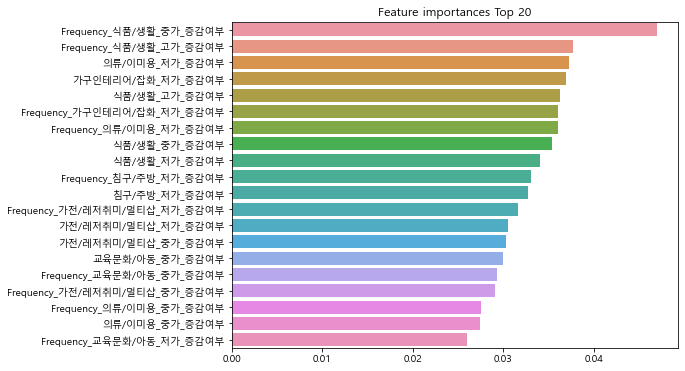

In [97]:
import matplotlib.pyplot as plt
import seaborn as sns

best_df_clf= dt_clf.feature_importances_


ftr_importances= pd.Series(best_df_clf,index= total_Q.columns[:-1])
ftr_top20= ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

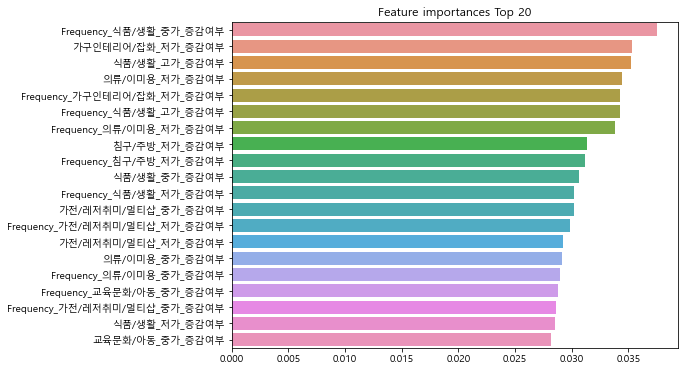

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

best_df_clf= rf_clf.feature_importances_


ftr_importances= pd.Series(best_df_clf,index= total_Q.columns[:-1])
ftr_top20= ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

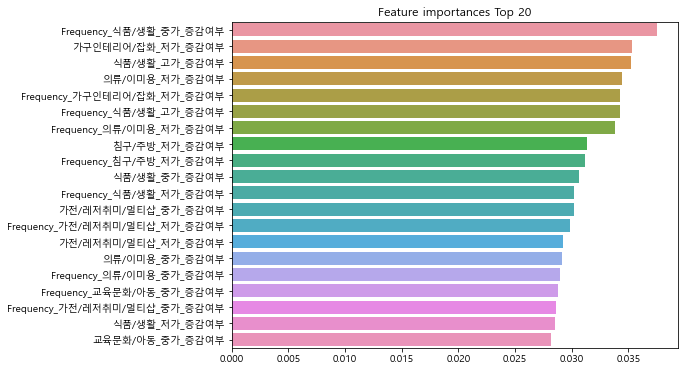

In [99]:
lgbm_clf= rf_clf.feature_importances_


ftr_importances= pd.Series(best_df_clf,index= total_Q.columns[:-1])
ftr_top20= ftr_importances.sort_values(ascending=False)[:20]

plt.figure(figsize=(8,6))
plt.title('Feature importances Top 20')
sns.barplot(x=ftr_top20, y=ftr_top20.index)
plt.show()

In [ ]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import roc_auc_score, accuracy_score,  confusion_matrix, confusion_matrix, f1_score, recall_score
from xgboost import XGBClassifier

# def objecdtive_func(search_space):
#     lgbm_clf = LGBMClassifier(n_estimators = 100,
#                                             num_leaves = int(search_space['num_leaves']),
#                                             max_depth = int(search_space['max_depth']),
#                                             min_child_samples = int(search_space['min_child_samples']),
#                                             subsample = search_space['subsample']
#                                             learning_rate = search_space['learning_rate'])

X_features_ohe = pd.get_dummies(plus_demo[['성별', '연령대']])
x = plus_demo.drop(['label', '성별', '연령대'], axis=1)
X_ohe = pd.concat([x, X_features_ohe], axis=1)

y = plus_demo['label']

# 학습/테스트용 분리
X_train, X_test, y_train, y_test = train_test_split(X_ohe, y, test_size = 0.2, random_state = 11)

X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size = 0.1, random_state=156)

lgbm_wrapper = LGBMClassifier(n_estimators = 400, leargning_rate = 0.05)


# LGBM 조기 중단 수행 가능
## early_stopping_rounds: 50번 수행하는데 계산이 안되면(logloss 손실이 낮아지는) 멈추기
## eval_metric = 'logloss': 오류함수의 평가 성능지표, 신경망의 성능이 얼마나 나쁜지를 나타내는 지표
## verbose = True: 과정 보여줌
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, 
                 early_stopping_rounds = 50, 
                 eval_metric = 'logloss',
                 eval_set = evals, 
                 verbose = True)
# 예측
preds = lgbm_wrapper.predict(X_test)

pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

def get_clf_eval(y_test , pred, pred_proba):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f},  AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
    
get_clf_eval(y_test, preds, pred_proba)
    
#     lgbm_clf = LGBMClassifier(boost_from_average=False, n_estimators=1000, num_leaves=64)


#     kfold = KFold(n_splits = 3)

#     roc_auc_list = []
#     for train_index, val_index in kfold.split(X_train):

#         X_tr, y_tr = X_train.iloc[train_index], y_train.iloc[train_index]
#         X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

#         lgbm_clf.fit(X_tr, y_tr, early_stopping_rounds=30, eval_metric = "auc", eval_set = [(X_tr, y_tr), (X_val, y_val)])

#         score = roc_auc_score(y_val, lgbm_clf.predict_proba(X_val)[:, 1])
#         roc_auc_list.append(score)

#     return -1*np.mean(roc_auc_list)